1.生成一个“异或”数据集，该数据集是非线性可分的，无法通过线性SVM来进行数据分割

(200, 2)
(200,)
(101,)


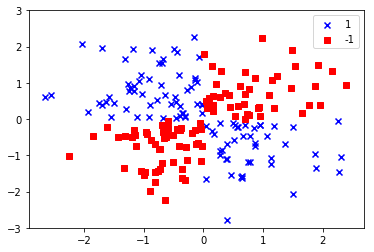

In [30]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0) # 设立随机数种子，使得每次生成的随机数相同
X_xor = np.random.randn(200, 2)
print(X_xor.shape)
# print(X_xor[:, 0] > 0) # 取第一列判断是否大于零，如果成立则返回True
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0) # 逻辑异或
print(y_xor.shape) # 200行一列的向量
y_xor = np.where(y_xor, 1, -1) # False的标签为-1，True的标签为1
# print(y_xor)
print(X_xor[y_xor==1, 0].shape)
plt.scatter(X_xor[y_xor==1, 0], X_xor[y_xor==1, 1], c='b', marker='x', label='1')
plt.scatter(X_xor[y_xor==-1, 0], X_xor[y_xor==-1, 1], c='r', marker='s', label='-1')
plt.ylim(-3, 3)
plt.legend(loc='upper right')
plt.show()

2.绘制决策区域，数据可视化

In [31]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    
    # setup marker generator and color map
    markers = ['s','x', 'o','^','v']
    colors = ['red', 'blue','lightgreen', 'gray','cyan']
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    """
    plot the decision surface
    将最大值，最小值向量生成二维数组xx1,xx2
    np.arange(x1_min, x1_max, resolution) 最小值最大值之间生成序列，步长为resolution
    ---
    """
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    new_x1 = np.arange(x1_min, x1_max, resolution)
    new_x2 = np.arange(x2_min, x2_max, resolution)
    xx1, xx2 = np.meshgrid(new_x1, new_x2)

    # xx1, xx2 = np.meshgrid(np.array(x1_min, x1_max, resolution), np.array(x2_min, x2_max, resolution))
    # 预测值
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap) # 绘制等高线(轮廓)，使用不同的颜色对不同区域进行填充，不专门绘制等高线，但不同颜色的分界即可代表等高线
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot all samples
    X_test, y_test = X[test_idx, :], y[test_idx]
    for idx ,c1 in enumerate(np.unique(y)):
        plt.scatter(x=X[y == c1, 0], y=X[y == c1, 1], alpha=0.8, cmap=cmap, marker=markers[idx], label=c1)
    
    # highlight test samples
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='red', alpha=1.0, linewidth=1, marker='o', s=55, label='test set')

3.导入SVM分类器，此时调用的SVM模型中使用了RBF径向基函数(核函数)来解决原始特征空间非线性可分的问题

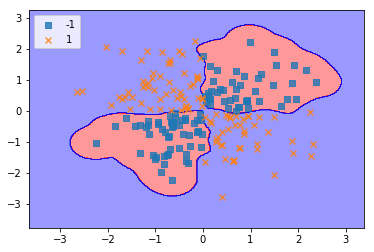

In [42]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', C=10.0, random_state=0, gamma=10)
svm.fit(X_xor, y_xor) # 训练模型
plot_decision_regions(X=X_xor, y=y_xor, classifier=svm)
plt.legend(loc="upper left")
plt.show()

总结：支持向量机(support vector machine, SVM)，通过最大化分类间隔使得模型的泛化误差最小。SVM可以通过核函数来解决非线性可分的问题，具体操作是将样本的原始特征数据经过核函数处理，映射到一个可以使得样本线性可分的更高维的特征空间。在高维空间中，线性超平面可以将数据进行分类，将此超平面又映射回低维空间后，这个超平面就变成非线性的。RBF径向基函数(也称高斯核函数)是一个常用的核函数，gamma是RBF径向基函数的超参数，其值会影响模型对数据集的拟合程度，适当调节该值能得到泛化能力较强的模型。